#Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


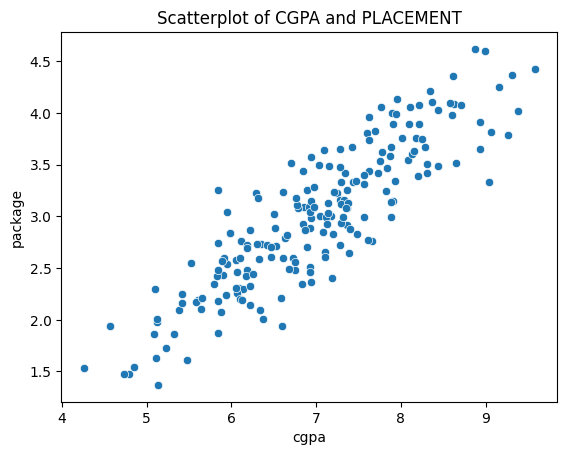

In [4]:
sns.scatterplot(x='cgpa',y='package',data=df)
plt.xlabel('cgpa')
plt.ylabel('package')
plt.title('Scatterplot of CGPA and PLACEMENT')
plt.show()

# Train test split

In [7]:
X = df.drop(columns=['package'])
y = df['package']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


# Apply Linear Regression on dataset

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

Text(0, 0.5, 'Package(in lpa)')

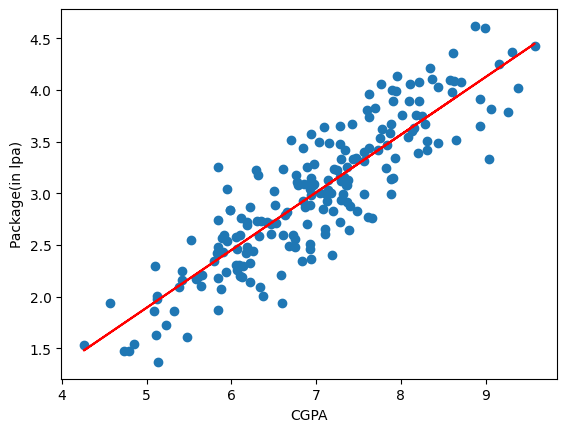

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

# Regression Metrics

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## MAE: Minimum Absoulate Error
```
MAE = (1/n) * Σ |yᵢ - ŷᵢ|
```

In [18]:
print(f'MAE: {mean_absolute_error(y_test,y_pred)} LPA')

MAE: 0.2884710931878175 LPA


## MSE: Mean Squared Error
```
MSE = (1/n) * Σ (yᵢ - ŷᵢ)²
```

In [20]:
print(f'MSE: {mean_squared_error(y_test,y_pred)} LPA^2')

MSE: 0.12129235313495527 LPA^2


## RMSE: Root Mean Squared Error (RMSE)
```
RMSE = √MSE
```

In [21]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))} LPA')

RMSE: 0.34827051717731616 LPA


## R-squared (R²)
```
R² = 1 - (SSres / SStot)
```

In [23]:
print(f'R-squared: {r2_score(y_test,y_pred)}')

R-squared: 0.780730147510384


## Adjusted R-squared
```code
R² = 1 - [(1 - R²) * (n - 1) / (n - p - 1)]
```

In [24]:
print(f'Adjusted R-squared: {1 - (1 - r2_score(y_test,y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)}')

Adjusted R-squared: 0.7749598882343415


## MedAE: Median Absolute Error
```
MedAE = median(|yᵢ - ŷᵢ|)
```

In [25]:
print(f'MedAE: {np.median(np.abs(y_test - y_pred))} LPA')

MedAE: 0.2516271056844266 LPA
